# Вычисления к работе 2.4.1
### Удовин Илья, 874

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

def create_plot(s1, s2):
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linewidth=0.2)
    plt.xlabel(s1, fontsize=15)
    plt.ylabel(s2, fontsize=15)   

f = lambda x, a, b: a * x + b
f2 = lambda x, a, b, c: 3 * a * x ** 2 + 2 * b * x + c
f3 = lambda x, a, b, c, d: a * x ** 3 + b * x ** 2 + c * x + d

In [2]:
rho = 13546
g = 9.81
R = 8.31

asc = pd.read_csv('asc.csv', header=0, sep=';')
print('Нагрев:')
display(asc)
asc = np.transpose(np.array(asc, dtype=float))
T1 = asc[0] + 273.15
h1 = asc[1]
h2 = asc[2]
P1 = rho * g * abs(h1 - h2) / 100

desc = pd.read_csv('desc.csv', header=0, sep=';')
print('Охлаждение:')
display(desc)
desc = np.transpose(np.array(desc, dtype=float))
T2 = desc[0] + 273.15
h1 = desc[1]
h2 = desc[2]
P2 = rho * g * abs(h1 - h2) / 100

T = np.append(T1, T2)
P = np.append(P1, P2)

Нагрев:


,"T, C","h1, см","h2, см"
0,20.1,10.00,5.49
1,21.0,10.11,5.34
2,22.0,10.28,5.18
3,23.0,10.41,5.04
4,24.0,10.58,4.92
5,25.0,10.73,4.72
6,26.0,10.90,4.53
7,27.0,11.08,4.36
8,28.0,11.28,4.19
9,29.0,11.45,3.98


Охлаждение:


,"T, C","h1, см","h2, см"
0,37.0,13.46,1.92
1,36.0,13.18,2.23
2,34.5,12.79,2.62
3,33.5,12.52,2.93
4,32.5,12.31,3.21
5,31.5,12.08,3.38
6,30.5,11.84,3.67
7,29.5,11.62,3.88
8,28.5,11.41,4.11
9,27.5,11.21,4.27


## Способ I. Построим график $P(T)$

<IPython.core.display.Javascript object>


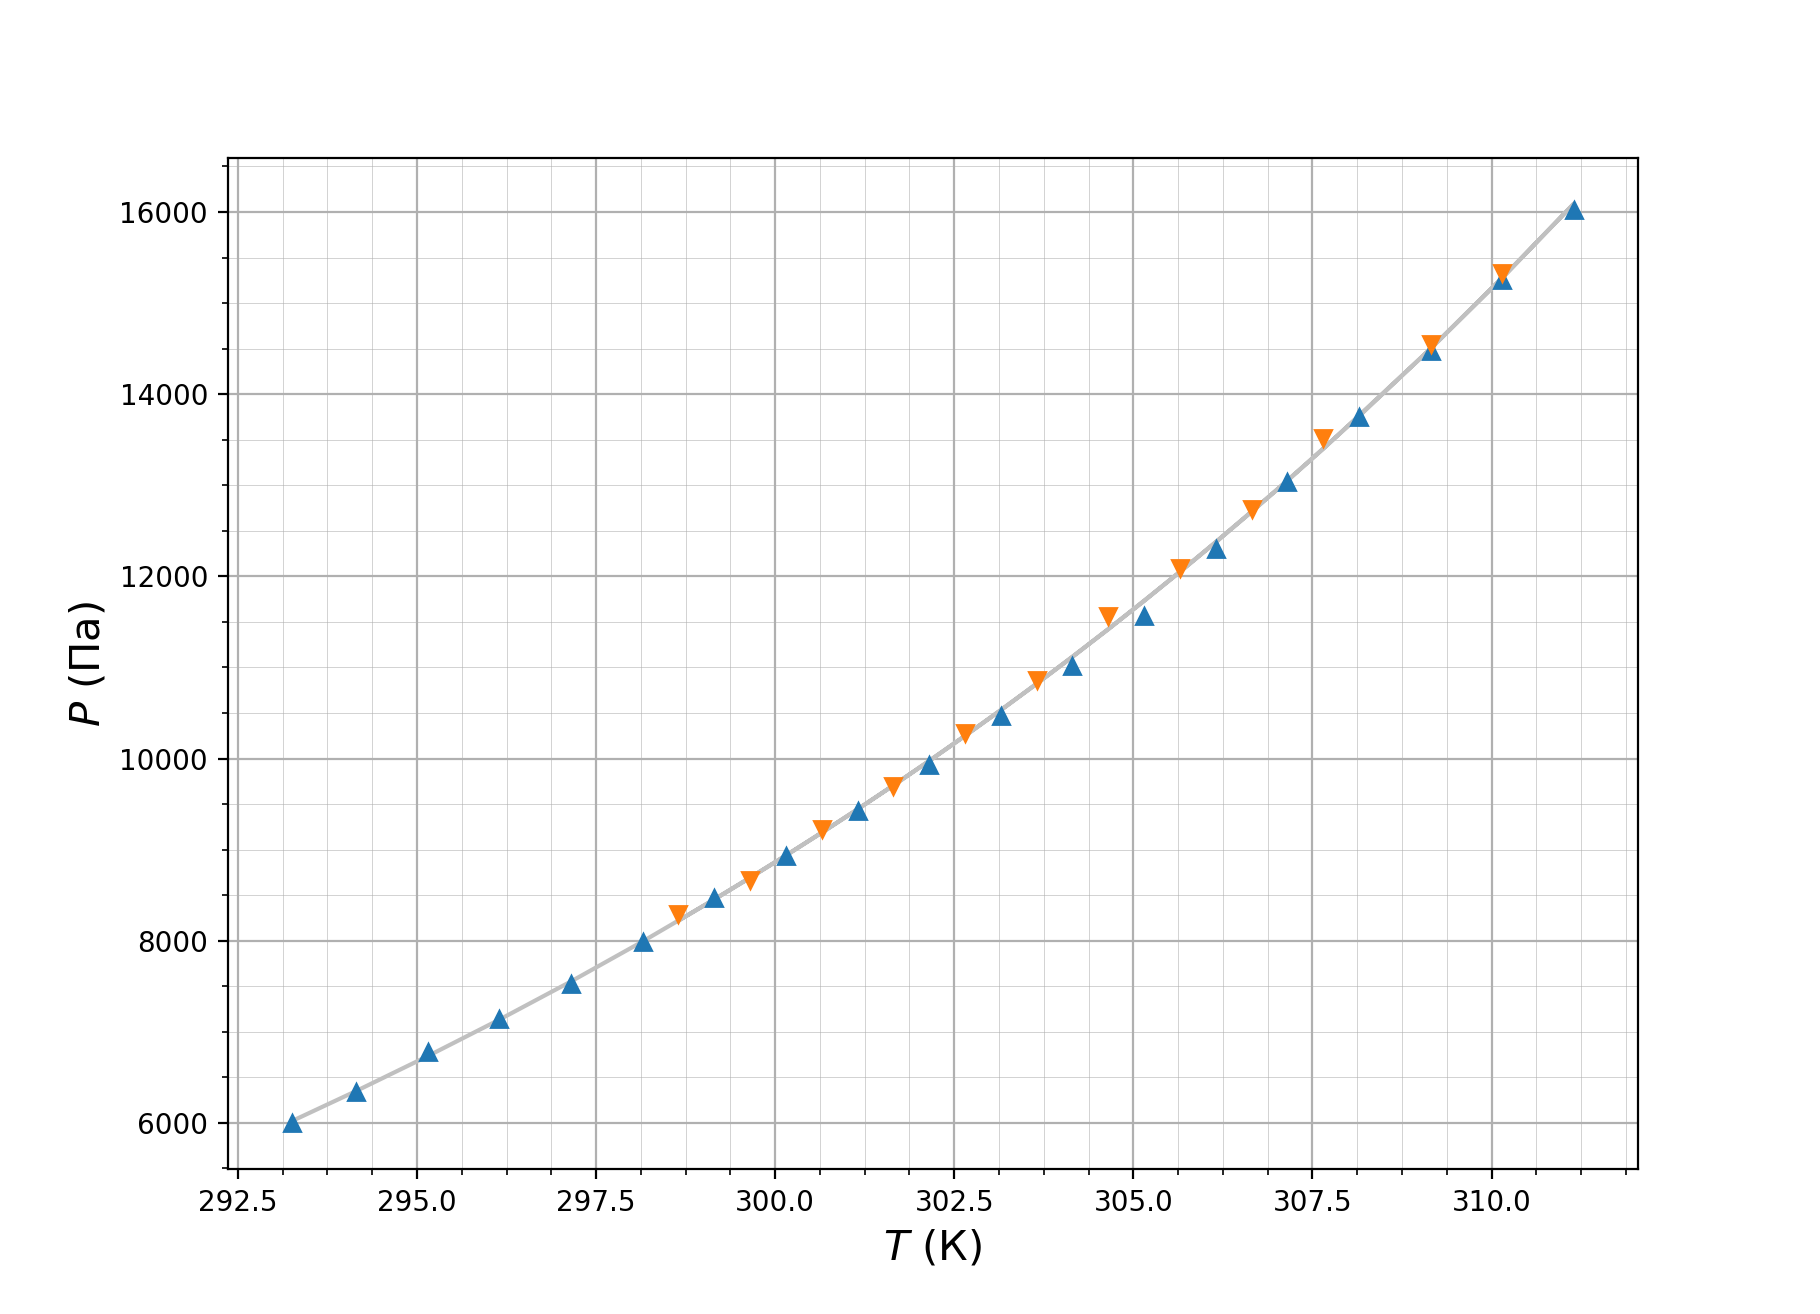

0.21422375044358144 -181.03963921450676 51274.152099141844 -4863858.879477453


In [3]:
create_plot('$T$ (К)', '$P$ (Па)')
opt, cov = curve_fit(f3, T, P)
plt.plot(T, f3(T, *opt), color='silver')
plt.plot(T1, P1, linestyle='', marker='^')
plt.plot(T2, P2, linestyle='', marker='v')
print(*opt)

$$P(T) \approx 0,2T^3 - 5,5T^2+322,25T+17,9$$

$$\frac{dP}{dT} \approx 0,6T^2 -11T +322,25$$

<IPython.core.display.Javascript object>


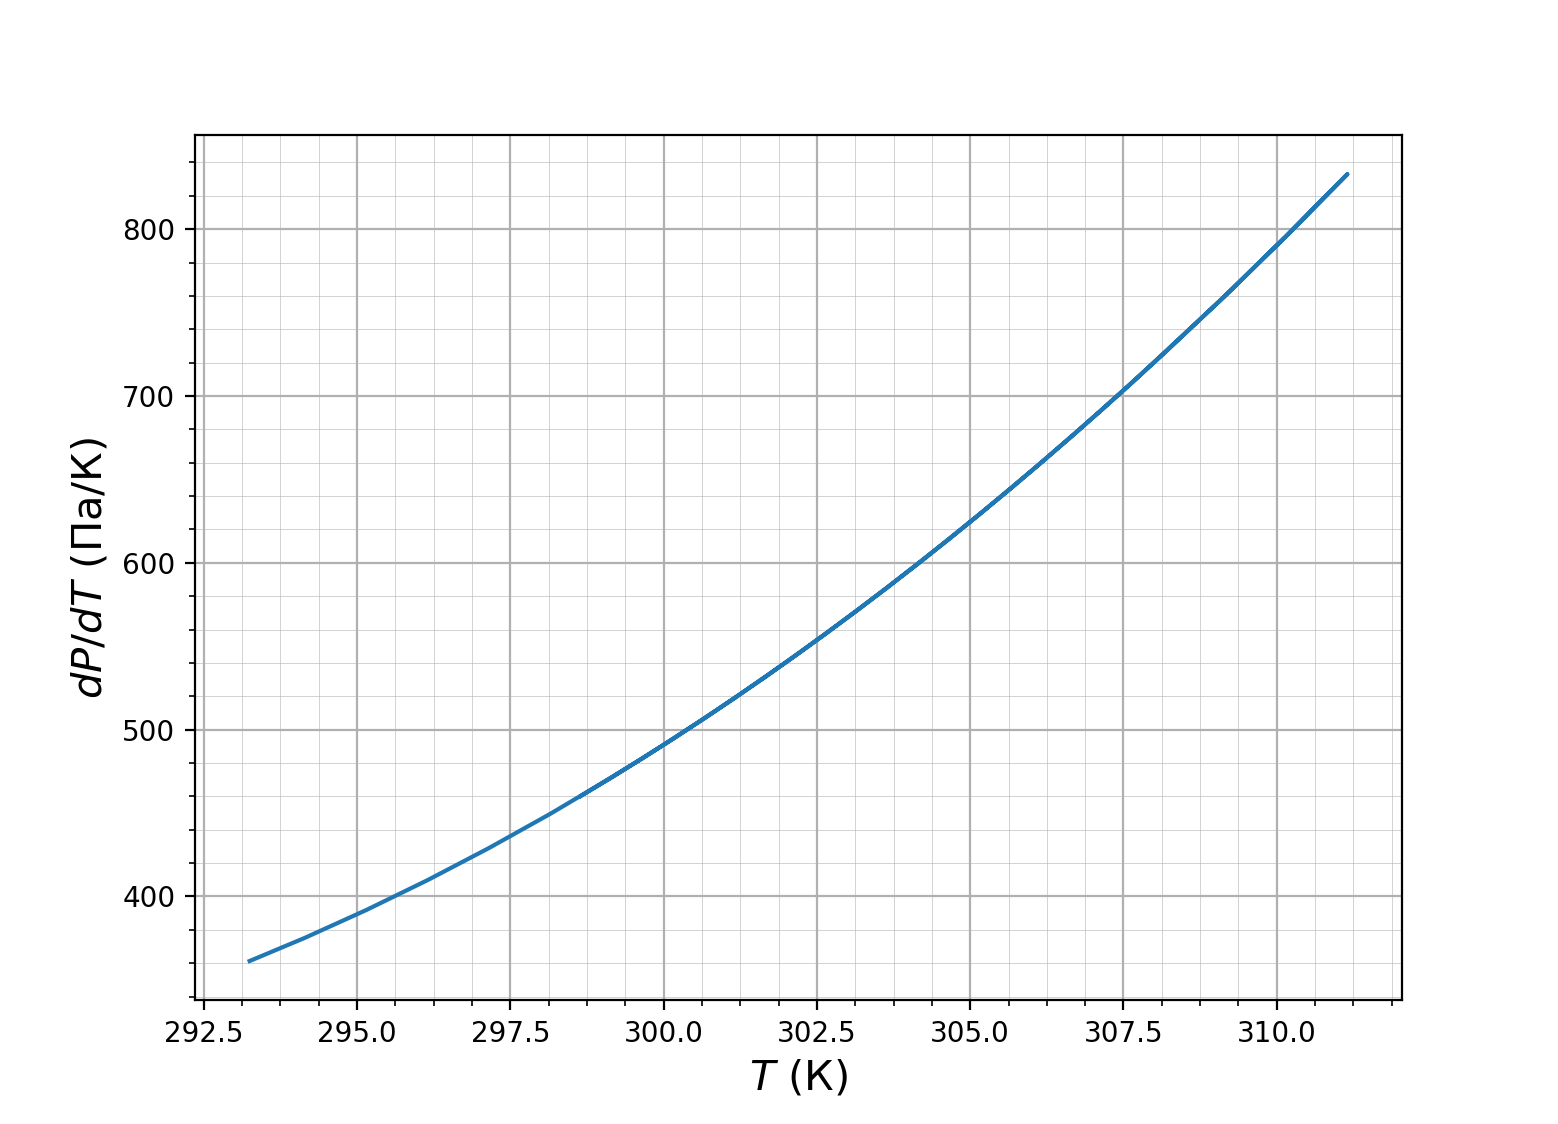

In [4]:
create_plot('$T$ (К)', '$dP/dT$ (Па/К)')
plt.plot(T, f2(T, *opt[:3]))

$$L = \frac{RT^2}{P}\frac{dP}{dT}$$

In [5]:
L = R * T * T * f2(T, *opt[:3]) / P
display(pd.DataFrame(np.column_stack([T, L]), columns=['T, К', 'L, Дж/моль']))
print('Среднее значение: <L> =', L.mean(), 'Дж/моль')

,"T, К","L, Дж/моль"
0,293.25,43078.811858
1,294.15,42555.913460
2,295.15,41851.535722
3,296.15,41848.550646
4,297.15,41847.754900
5,298.15,41572.809836
6,299.15,41401.055600
7,300.15,41441.953044
8,301.15,41489.916072
9,302.15,41601.188633


Среднее значение: <L> = 41623.19482303434 Дж/моль


## Способ II. Построим график $\ln P (1/T)$

<IPython.core.display.Javascript object>


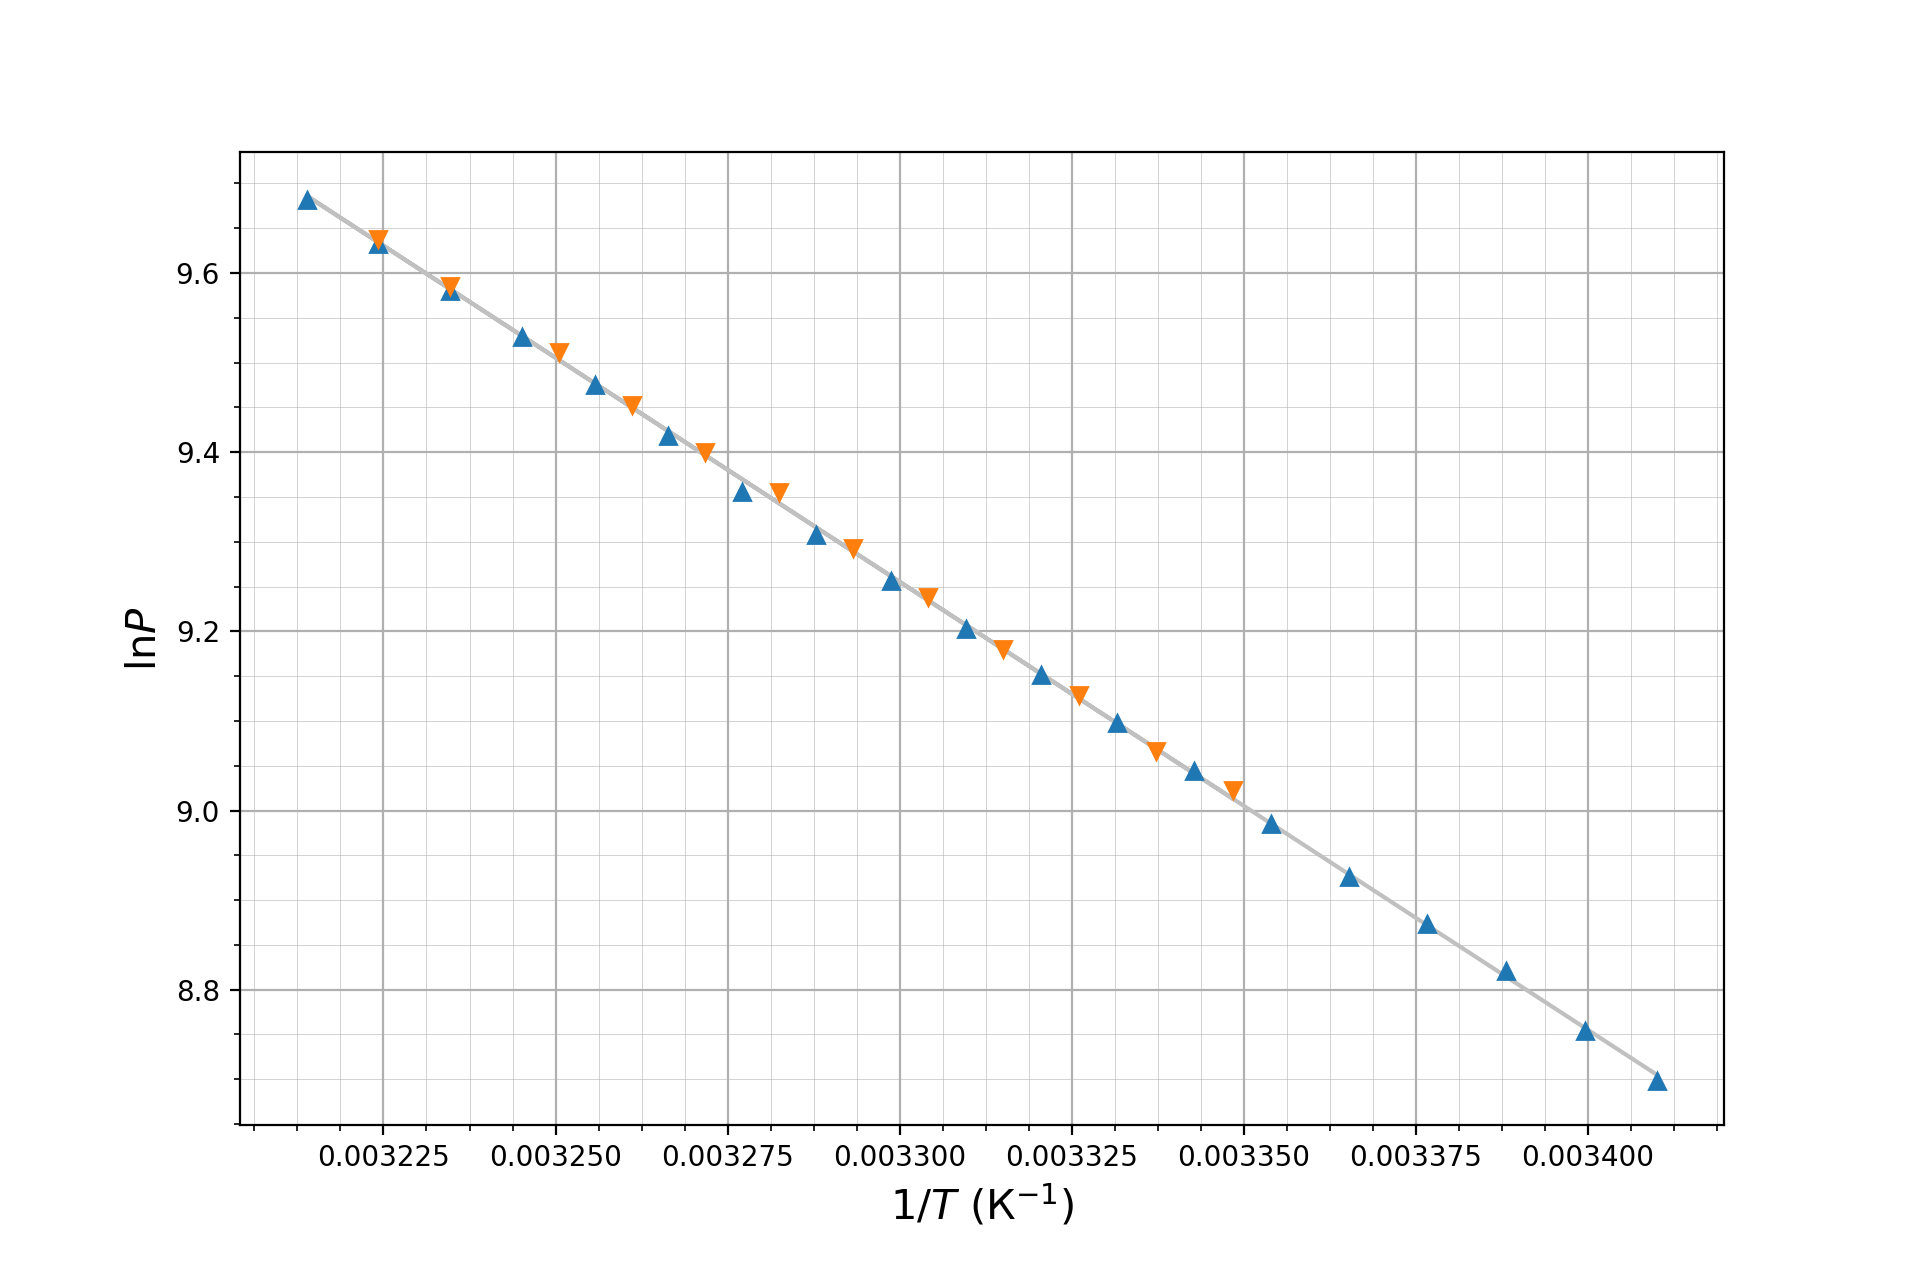

-5001.056107154785 25.75888788010155


In [6]:
create_plot('$1/T$ (К$^{-1}$)', '$\ln P$')
opt, cov = curve_fit(f, 1 / T, np.log(P))
plt.plot(1 / T, f(1 / T, *opt), color='silver')
plt.plot(1 / T1, np.log(P1), linestyle='', marker='^')
plt.plot(1 / T2, np.log(P2), linestyle='', marker='v')
print(*opt)

$$L = -R\frac{d(\ln P)}{d(1/T)}$$

In [7]:
print('d(lnP)/d(1/T) =', round(opt[0], 3), 'К')
print(' ' * 12 + 'L =', round(-R * opt[0], 3), 'Дж/моль')

d(lnP)/d(1/T) = -5001.056 К
            L = 41558.776 Дж/моль


Как можно видеть, результаты находятся в согласии друг с другом. Их среднее арифметическое

In [8]:
print(round((-R * opt[0] + L.mean()) / 2, 3), 'Дж/моль')

41590.986 Дж/моль


## Оценим ошибку измерений

$$\frac{\sigma_L^\text{сист}}{L} = \sqrt{\left(\frac{\sigma_P}{P}\right)^2 + \left(\frac{\sigma_T}{T}\right)^2} = \sqrt{\left(\frac{\sigma_h}{h}\right)^2 + \left(\frac{\sigma_T}{T}\right)^2}$$

$$\sigma_L^\text{случ} = \sqrt{\frac{\sum_{k=1}^N (L_k - \left<L\right>)^2}{N(N-1)}}$$

In [9]:
sigma_h = .01
sigma_P = P.mean() * sigma_h / h1.mean()
sigma_T = .01
sigma_L1 = L.mean() * math.sqrt((sigma_P / P.mean()) ** 2 + (sigma_T / T.mean()) ** 2)
print('систематическая:', round(sigma_L1, 3), 'Дж/моль')
N = L.size
s = 0
for i in range(N):
    s += (L[i] - L.mean()) ** 2
sigma_L2 = math.sqrt(s / (N * (N - 1)))
print('случайная:' + ' ' * 6, round(sigma_L2, 3), 'Дж/моль')
sigma_L = math.sqrt(sigma_L1 ** 2 + sigma_L2 ** 2)
print('полная:' + ' ' * 9, round(sigma_L, 3), 'Дж/моль')

систематическая: 34.632 Дж/моль
случайная:       73.242 Дж/моль
полная:          81.017 Дж/моль


# Результат

$$L = (41591 \pm 81) \ \frac{\text{Дж}}{\text{моль}}$$

## Вывод


В ходе работы было получено значение теплоты испарения этилового спитра с помощью уравнения Клапейрона&mdash;Клаузиуса. При этом, значения, полученные различными способами хорошо согласуются друг с другом, а ошибка найденной величины мала по отношению к ней.